In [2]:
import scipy.io
import pynapple as nap
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from assembly  import runSignificance,extractPatterns,runPatterns, computeAssemblyActivity
from Process import process_epochs_and_neurons
from scipy import stats
from matplotlib_venn import venn2
from assembly_plot import plot_assembly_activity,  plot_assembly_patterns, plot_assembly_counts, plot_assembly_activity_overtime, normalize_patterns, count_cells_per_pattern_type, plot_multiple_epochs, get_above_threshold_neurons

## Loading Mice Sessions with CA2-CA3

In [4]:
warnings.filterwarnings('ignore')
p_path = "D:/Research Topic/tristan/step10_olivadata"
A013_day7_bins_p,  A013_day7_ca2_p,  A013_day7_ca3_p,  A013_day7_ca1_p, A013_day7_ca2_p_id,  A013_day7_ca3_p_id,  A013_day7_ca1_p_id = process_epochs_and_neurons(p_path,'A013_day7')
A015_day8_bins_p,  A015_day8_ca2_p,  A015_day8_ca3_p,  A015_day8_ca1_p, A015_day8_ca2_p_id,  A015_day8_ca3_p_id,  A015_day8_ca1_p_id = process_epochs_and_neurons(p_path,'A015_day8')
A015_day12_bins_p, A015_day12_ca2_p, A015_day12_ca3_p, A015_day12_ca1_p, A015_day12_ca2_p_id, A015_day12_ca3_p_id, A015_day12_ca1_p_id = process_epochs_and_neurons(p_path,'A015_day12')
A016_day12_bins_p, A016_day12_ca2_p, A016_day12_ca3_p, A016_day12_ca1_p, A016_day12_ca2_p_id, A016_day12_ca3_p_id, A016_day12_ca1_p_id = process_epochs_and_neurons(p_path,'A016_day12')

In [5]:
mice_sessions = [
    'A013_day7_bins_p','A015_day8_bins_p', 'A015_day12_bins_p', 'A016_day12_bins_p'
]

ca2_indices_dict = {
    'A013_day7_bins_p': A013_day7_ca2_p_id,
    'A015_day8_bins_p': A015_day8_ca2_p_id,
    'A015_day12_bins_p': A015_day12_ca2_p_id,
    'A016_day12_bins_p': A016_day12_ca2_p_id,
}
ca3_indices_dict = {
    'A013_day7_bins_p': A013_day7_ca3_p_id,
    'A015_day8_bins_p': A015_day8_ca3_p_id,
    'A015_day12_bins_p': A015_day12_ca3_p_id,
    'A016_day12_bins_p': A016_day12_ca3_p_id,
}
ca1_indices_dict = {
    'A013_day7_bins_p': A013_day7_ca1_p_id,
    'A015_day8_bins_p': A015_day8_ca1_p_id,
    'A015_day12_bins_p': A015_day12_ca1_p_id,
    'A016_day12_bins_p': A016_day12_ca1_p_id,
}

bins_data = {
    'A013_day7_bins_p': A013_day7_bins_p,
    'A015_day8_bins_p': A015_day8_bins_p,
    'A015_day12_bins_p': A015_day12_bins_p,
    'A016_day12_bins_p': A016_day12_bins_p,
}

In [75]:
A015_day12_ca2_p_id

[10, 11, 16, 17, 18, 19, 20, 21, 22]

## Assembly Operations

Epoch: A013_day7_rest_hab_pre, Assembly 1 - Neurons above threshold: [1, 4, 6, 17, 18, 19, 2, 14, 15]
Epoch: A013_day7_rest_hab_pre, Assembly 2 - Neurons above threshold: [3, 25, 2, 5, 12, 14, 16, 28]
Epoch: A013_day7_rest_hab_pre, Assembly 3 - Neurons above threshold: [8, 9, 18, 19, 22, 25, 2, 11, 14, 27, 28]
Epoch: A013_day7_rest_hab_pre, Assembly 4 - Neurons above threshold: [3, 4, 6, 18, 19, 20, 21, 23, 29, 15]
Epoch: A013_day7_rest_hab_pre, Assembly 5 - Neurons above threshold: [6, 8, 19, 10, 12, 13, 14, 27, 28]
Epoch: A013_day7_rest_hab_pre, Assembly 6 - Neurons above threshold: [4, 6, 18, 24, 25, 26]
Epoch: A013_day7_rest_hab_pre, Assembly 7 - Neurons above threshold: [20, 29, 30, 31]
Epoch: A013_day7_habituation_arena, Assembly 1 - Neurons above threshold: [1, 3, 18, 21, 22, 23, 29, 10, 11, 13, 14, 15, 27, 28]
Epoch: A013_day7_habituation_arena, Assembly 2 - Neurons above threshold: [1, 4, 8, 9, 18, 20, 22, 24, 25, 26, 12, 13]
Epoch: A013_day7_habituation_arena, Assembly 3 - Ne

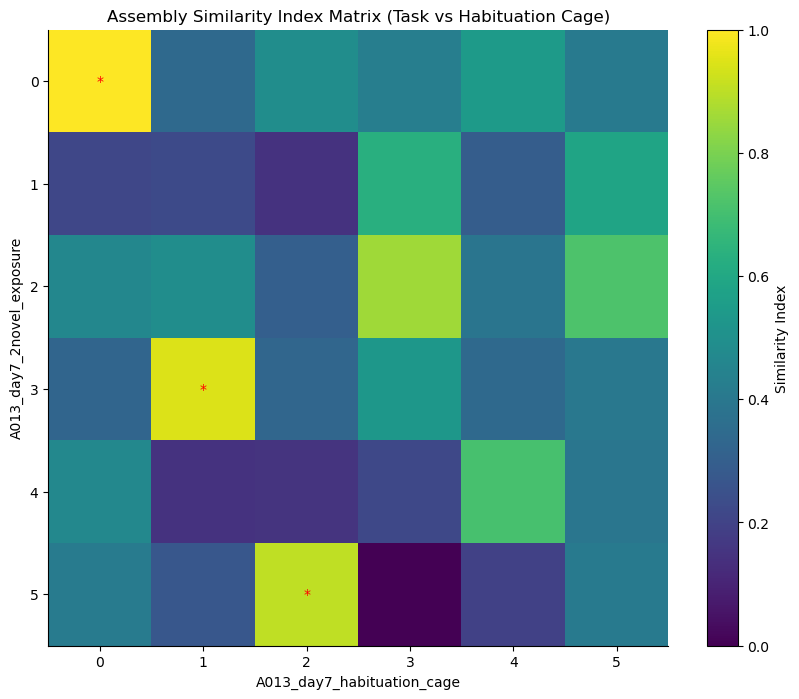

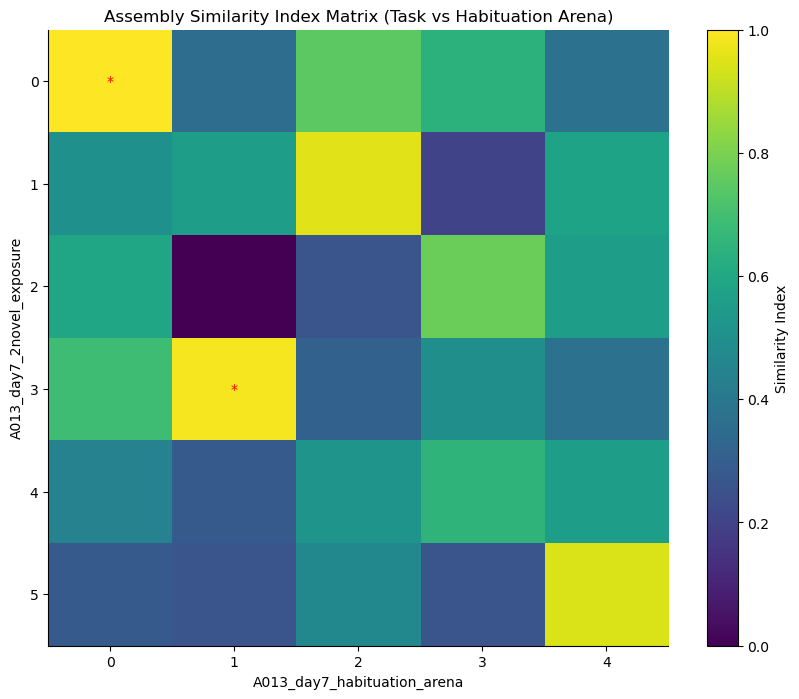

Epoch: A015_day8_rest_hab_pre, Assembly 1 - Neurons above threshold: [8, 13, 16, 20, 0, 5, 6, 9, 11, 12, 14, 19]
Epoch: A015_day8_rest_hab_pre, Assembly 2 - Neurons above threshold: [13, 16, 17, 0, 1, 4, 10, 12, 14, 18]
Epoch: A015_day8_habituation_arena, Assembly 1 - Neurons above threshold: [8, 13, 16, 17, 20, 0, 1, 4, 5, 6, 9, 10, 11, 12, 14, 18, 19]
Epoch: A015_day8_rest_hab_post, Assembly 1 - Neurons above threshold: [8, 13, 16, 17, 20, 0, 5, 6, 9, 10, 11, 12, 14, 19]
Epoch: A015_day8_rest_hab_post, Assembly 2 - Neurons above threshold: [8, 16, 20, 0, 1, 4, 6, 12, 14, 18, 19]
Epoch: A015_day8_habituation_cage, Assembly 1 - Neurons above threshold: [8, 13, 16, 17, 0, 4, 5, 6, 9, 10, 11, 12, 14, 18, 19]
Epoch: A015_day8_habituation_cage, Assembly 2 - Neurons above threshold: [8, 13, 16, 17, 20, 0, 1, 4, 6, 10, 11, 12, 14]
Epoch: A015_day8_rest_pre, Assembly 1 - Neurons above threshold: [8, 13, 17, 20, 0, 1, 4, 5, 9, 10, 11, 18, 19]
Epoch: A015_day8_rest_pre, Assembly 2 - Neurons abo

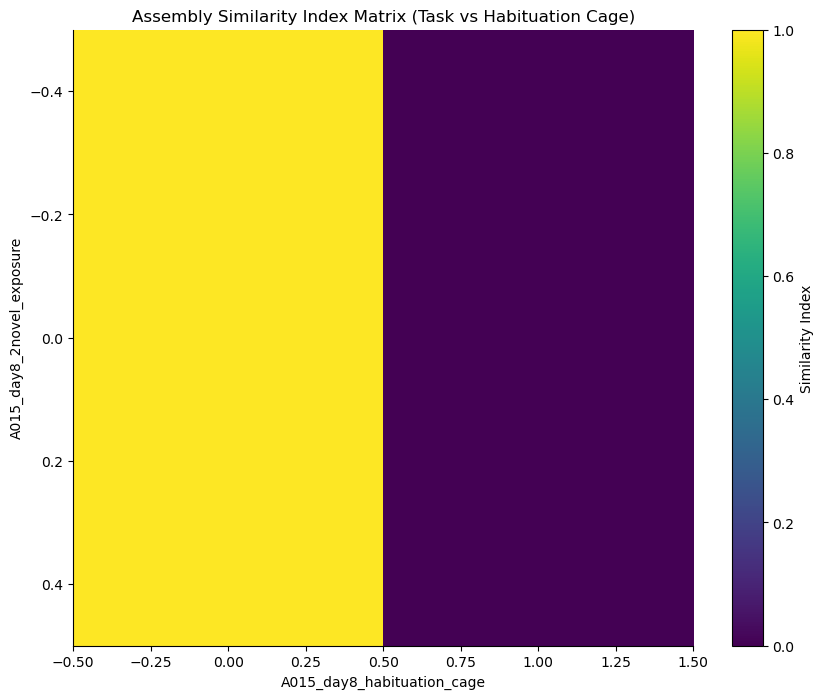

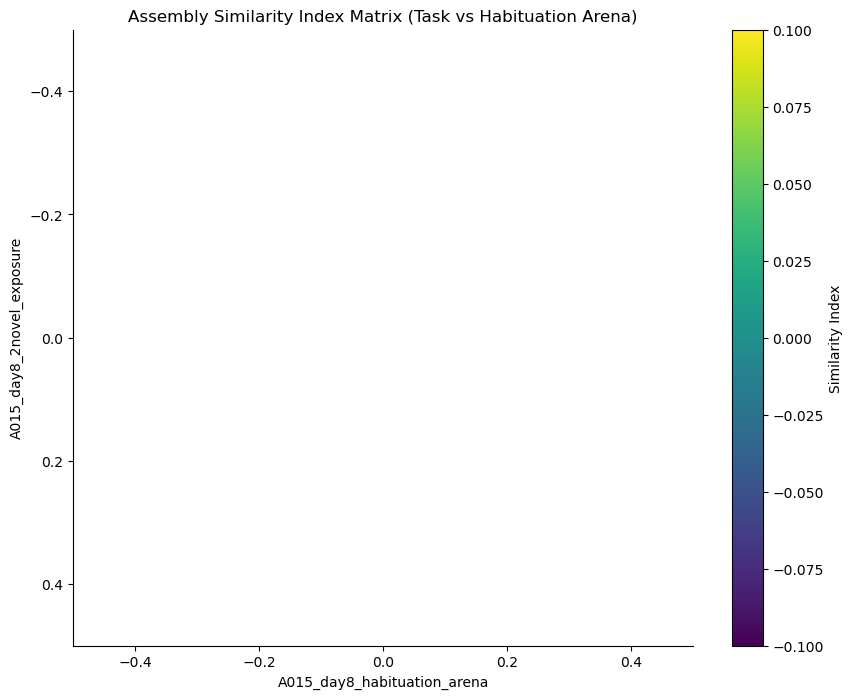

Epoch: A015_day12_rest_hab_pre, Assembly 1 - Neurons above threshold: [10, 11, 16, 17, 18, 19, 20, 21, 22, 4, 5, 6, 8, 23, 24]
Epoch: A015_day12_rest_hab_pre, Assembly 2 - Neurons above threshold: [11, 17, 18, 19, 21, 2, 3, 13, 14, 15, 23, 24]
Epoch: A015_day12_habituation_arena, Assembly 1 - Neurons above threshold: [10, 11, 16, 17, 18, 19, 20, 21, 22, 5, 6, 23, 24]
Epoch: A015_day12_habituation_arena, Assembly 2 - Neurons above threshold: [18, 19, 21, 2, 3, 4, 5, 8, 13, 14, 15, 23]
Epoch: A015_day12_rest_hab_post, Assembly 1 - Neurons above threshold: [10, 11, 16, 20, 21, 22, 4, 5, 6, 8, 23, 24]
Epoch: A015_day12_rest_hab_post, Assembly 2 - Neurons above threshold: [17, 18, 19, 23]
Epoch: A015_day12_rest_hab_post, Assembly 3 - Neurons above threshold: [2, 3, 4, 6, 8, 13, 14, 15]
Epoch: A015_day12_habituation_cage, Assembly 1 - Neurons above threshold: [10, 11, 16, 17, 18, 20, 21, 5, 6, 23, 24]
Epoch: A015_day12_habituation_cage, Assembly 2 - Neurons above threshold: [18, 19, 22, 2, 3

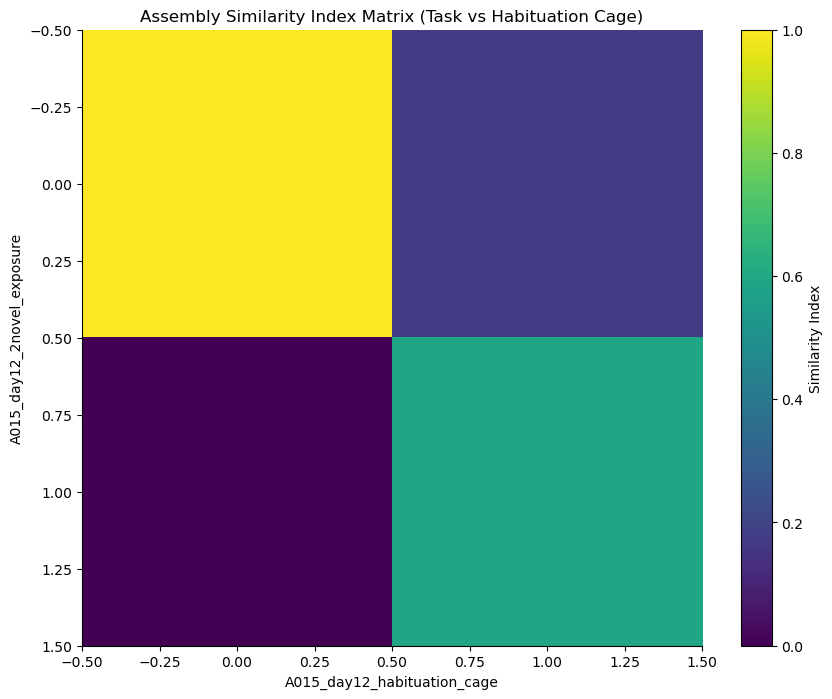

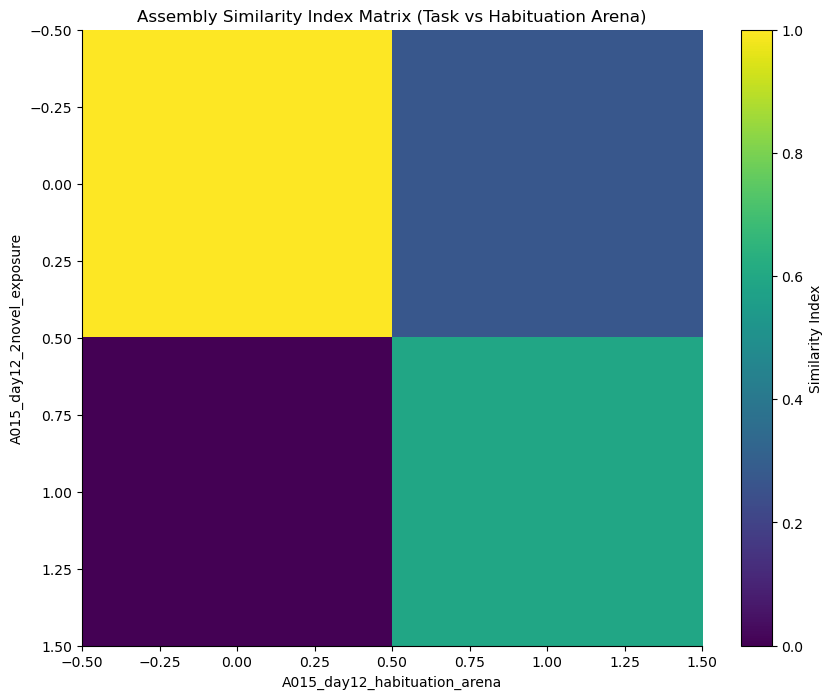

Epoch: A016_day12_rest_hab_pre, Assembly 1 - Neurons above threshold: [15, 9, 24, 31, 38, 7, 8, 10, 11]
Epoch: A016_day12_rest_hab_pre, Assembly 2 - Neurons above threshold: [18, 19]
Epoch: A016_day12_rest_hab_pre, Assembly 3 - Neurons above threshold: [14, 16, 23, 28, 32, 24]
Epoch: A016_day12_rest_hab_pre, Assembly 4 - Neurons above threshold: [14, 16, 30, 35, 10]
Epoch: A016_day12_rest_hab_pre, Assembly 5 - Neurons above threshold: [0, 16, 37, 9, 8, 11, 22]
Epoch: A016_day12_habituation_arena, Assembly 1 - Neurons above threshold: [15, 18, 19, 9, 30, 31, 38]
Epoch: A016_day12_habituation_arena, Assembly 2 - Neurons above threshold: [14, 15, 16, 23, 28, 32, 10]
Epoch: A016_day12_habituation_arena, Assembly 3 - Neurons above threshold: [0, 23, 28, 37, 24, 35, 7, 8, 10]
Epoch: A016_day12_habituation_arena, Assembly 4 - Neurons above threshold: [0, 15, 37, 9, 24, 35, 10, 11, 22]
Epoch: A016_day12_rest_hab_post, Assembly 1 - Neurons above threshold: [23, 28, 32]
Epoch: A016_day12_rest_ha

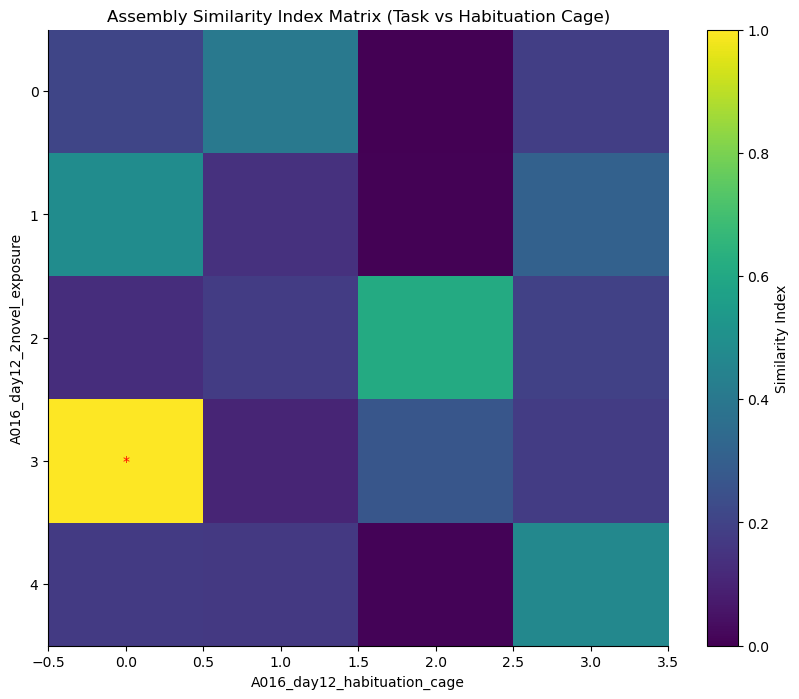

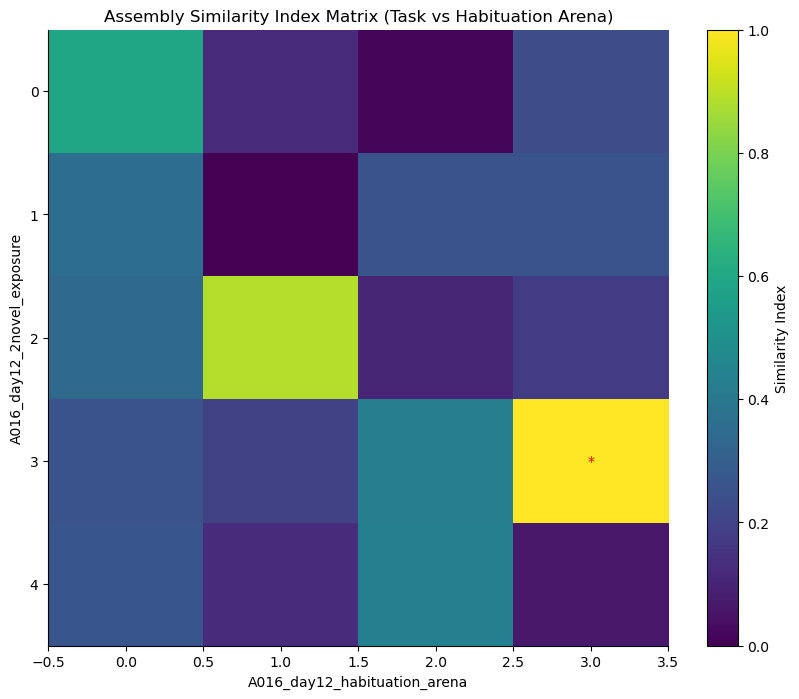

In [55]:
results_list = []
ptterns_All = {}
ptterns_type_All = {}
assembly_activities_all = {}
zcmates_all = {}
cell_counts = {}
Social_joint_CA2_CA3_assembly_activities_over_time_all = {}
Non_Social_arena_joint_CA2_CA3_assembly_activities_over_time_all = {}
Non_Social_cage_joint_CA2_CA3_assembly_activities_over_time_all = {}
epoch_lengths_all={}

for session in mice_sessions:
    ca2_indices = ca2_indices_dict[session]
    ca3_indices = ca3_indices_dict[session]
    ca1_indices = ca1_indices_dict[session]
    session_data_p = bins_data[session]

    patterns = {}
    assembly_activities = {}
    zactmats = {}
    Social_joint_CA2_CA3_assembly_activities_over_time = {}
    Non_Social_arena_joint_CA2_CA3_assembly_activities_over_time = {}
    Non_Social_cage_joint_CA2_CA3_assembly_activities_over_time = {}
    include_epoch = {session.split('_')[0] + '_' + session.split('_')[1] + '_rest_hab_pre',
                     session.split('_')[0] + '_' + session.split('_')[1] + '_habituation_arena',
                     session.split('_')[0] + '_' + session.split('_')[1] + '_rest_hab_post',
                     session.split('_')[0] + '_' + session.split('_')[1] + '_habituation_cage',
                     session.split('_')[0] + '_' + session.split('_')[1] + '_rest_pre',
                     session.split('_')[0] + '_' + session.split('_')[1] + '_2novel_exposure',
                     session.split('_')[0] + '_' + session.split('_')[1] + '_exposure_reversed',
                     session.split('_')[0] + '_' + session.split('_')[1] + '_rest_post2',
                     session.split('_')[0] + '_' + session.split('_')[1] + '_1novel_exposure',
                     session.split('_')[0] + '_' + session.split('_')[1] + '_rest_post1'}
    
    
    len_epoc=[]
    for names in session_data_p.keys():
        len_epoc.append(len(session_data_p[names].to_numpy()))
        
    epoch_lengths_all[session]= len_epoc
    

    session_data = dict(filter(lambda item: item[0] in include_epoch, session_data_p.items()))
    
    for epoch_name, epoch_data in session_data.items():
        patterns_epoch, significance, zactmat = runPatterns(epoch_data.values.T, method='ica', nullhyp='mp')
        patterns_epoch = normalize_patterns(patterns_epoch)
        assembly_activity = computeAssemblyActivity(patterns_epoch, zactmat)
        zactmats[epoch_name]= zactmat
        assembly_activities[epoch_name] = assembly_activity
        patterns[epoch_name] = patterns_epoch
        if '2novel' in epoch_name: # Skip the original epoch
            significant_patterns_social= patterns[epoch_name]
        elif 'arena' in epoch_name:
            significant_patterns_non_social_arena = patterns[epoch_name]
        elif 'cage' in epoch_name:
            significant_patterns_non_social_cage = patterns[epoch_name]
        

    assembly_counts, pattern_types = plot_assembly_patterns(patterns, list(session_data.keys()), ca2_indices,
                                                            ca3_indices, ca1_indices)
    
    
    
    for epoch_name, zactmat in zactmats.items():
        projected_activity = computeAssemblyActivity(significant_patterns_social, zactmat)
        Social_joint_CA2_CA3_assembly_activities_over_time[epoch_name] = projected_activity

    for epoch_name, zactmat in zactmats.items():
        projected_activity = computeAssemblyActivity(significant_patterns_non_social_arena, zactmat)
        Non_Social_arena_joint_CA2_CA3_assembly_activities_over_time[epoch_name] = projected_activity

    for epoch_name, zactmat in zactmats.items():
        projected_activity = computeAssemblyActivity(significant_patterns_non_social_cage, zactmat)
        Non_Social_cage_joint_CA2_CA3_assembly_activities_over_time[epoch_name] = projected_activity

    '''plot_assembly_activity_overtime???'''
    ###plot_assembly_activity_overtime(Social_joint_CA2_CA3_assembly_activities_over_time, len_epoc)
    
    ptterns_All[session] = patterns
    assembly_activities_all[session] = assembly_activities
    ptterns_type_All[session] = pattern_types
    zcmates_all[session] = zactmats
    Social_joint_CA2_CA3_assembly_activities_over_time_all[session] = Social_joint_CA2_CA3_assembly_activities_over_time
    Non_Social_arena_joint_CA2_CA3_assembly_activities_over_time_all[session] = Non_Social_arena_joint_CA2_CA3_assembly_activities_over_time
    Non_Social_cage_joint_CA2_CA3_assembly_activities_over_time_all[session] = Non_Social_cage_joint_CA2_CA3_assembly_activities_over_time
    
    num_neurons = len(epoch_data[next(iter(epoch_data))].values.T)
    threshold = abs(1 / np.sqrt(num_neurons))

    cell_counts[session] = count_cells_per_pattern_type(patterns, pattern_types, ca2_indices, ca3_indices, ca1_indices,
                                                        threshold)
    epoch_names = [session.split('_')[0] + '_' + session.split('_')[1] + '_2novel_exposure',
                   session.split('_')[0] + '_' + session.split('_')[1] + '_habituation_cage',
                   session.split('_')[0] + '_' + session.split('_')[1] + '_habituation_arena']

    Task = patterns[epoch_names[0]]
    habituation_cage = patterns[epoch_names[1]]
    habituation_arena = patterns[epoch_names[2]]

    similarity_matrix = np.dot(Task, habituation_cage.T)
    max_similarity = similarity_matrix.max()
    min_similarity = similarity_matrix.min()
    similarity_matrix = (similarity_matrix - min_similarity) / (max_similarity - min_similarity)

    # Perform permutation test
    n_permutations = 1000
    surrogate_distributions = []

    for _ in range(n_permutations):
        permuted_habituation_cage = np.random.permutation(habituation_cage)
        surrogate_similarity = np.dot(Task, permuted_habituation_cage.T)
        surrogate_similarity = (surrogate_similarity - surrogate_similarity.min()) / (
                surrogate_similarity.max() - surrogate_similarity.min())
        surrogate_distributions.append(surrogate_similarity.flatten())

    surrogate_distributions = np.concatenate(surrogate_distributions)

    threshold = np.percentile(surrogate_distributions, 90.9)
    significant_pairs = similarity_matrix > threshold

    #  for better handling
    similarity_df = pd.DataFrame(similarity_matrix)
    significant_df = pd.DataFrame(significant_pairs, columns=similarity_df.columns, index=similarity_df.index)
    significant_pairs_indices = np.argwhere(significant_pairs)

    plt.figure(figsize=(10, 8))
    plt.imshow(similarity_matrix, cmap='viridis', aspect='auto')
    plt.colorbar(label='Similarity Index')
    plt.title('Assembly Similarity Index Matrix (Task vs Habituation Cage)')
    plt.xlabel(epoch_names[1])
    plt.ylabel(epoch_names[0])

    # Mark significant pairs with '*'
    for i in range(similarity_df.shape[0]):
        for j in range(similarity_df.shape[1]):
            if significant_pairs[i, j]:
                plt.text(j, i, '*', ha='center', va='center', color='red')

    plt.show()

    similarity_matrix = np.dot(Task, habituation_arena.T)
    max_similarity = similarity_matrix.max()
    min_similarity = similarity_matrix.min()
    similarity_matrix = (similarity_matrix - min_similarity) / (max_similarity - min_similarity)

    # Perform permutation test
    n_permutations = 1000
    surrogate_distributions = []

    for _ in range(n_permutations):
        permuted_habituation_arena = np.random.permutation(habituation_arena)
        surrogate_similarity = np.dot(Task, permuted_habituation_arena.T)
        surrogate_similarity = (surrogate_similarity - surrogate_similarity.min()) / (
                surrogate_similarity.max() - surrogate_similarity.min())
        surrogate_distributions.append(surrogate_similarity.flatten())

    surrogate_distributions = np.concatenate(surrogate_distributions)

    threshold = np.percentile(surrogate_distributions, 90.9)

    significant_pairs = similarity_matrix > threshold

    similarity_df = pd.DataFrame(similarity_matrix)
    significant_df = pd.DataFrame(significant_pairs, columns=similarity_df.columns, index=similarity_df.index)
    significant_pairs_indices = np.argwhere(significant_pairs)

    plt.figure(figsize=(10, 8))
    plt.imshow(similarity_matrix, cmap='viridis', aspect='auto')
    plt.colorbar(label='Similarity Index')
    plt.title('Assembly Similarity Index Matrix (Task vs Habituation Arena)')
    plt.xlabel(epoch_names[2])
    plt.ylabel(epoch_names[0])

    # Mark significant pairs with '*'
    for i in range(similarity_df.shape[0]):
        for j in range(similarity_df.shape[1]):
            if significant_pairs[i, j]:
                plt.text(j, i, '*', ha='center', va='center', color='red')

    plt.show()

## Assembly Strength Social

<b> AO13_DAY 7 Session <b>

1. In 2Novel exposure we had 6 Joint Cell Assemblies
2. Assembly one (index 0), has above threshhold similarity with Joint Assemblies in Habituation Cage Session
3. Assembly one and two (index 0,1), have above threshhold similarity with Joint Assemblies in Habituation Arena
4. We will remove the strength of these assemblies, to only isolate <b> Social Joint Assemblies <b>

In [9]:
A013_day7_activity_Social = Social_joint_CA2_CA3_assembly_activities_over_time_all['A013_day7_bins_p']

In [11]:
def remove_indices(d):
    for key in d.keys():
        d[key] = d[key][2:]  # Removing the first two rows (index 0 and 1)
    return d

A013_day7_activity_Social = remove_indices(A013_day7_activity_Social)

In [13]:
epoch_lengths = [
    len(A013_day7_bins_p['A013_day7_rest_hab_pre'].to_numpy()),
    len(A013_day7_bins_p['A013_day7_habituation_arena'].to_numpy()),
    len(A013_day7_bins_p['A013_day7_rest_hab_post'].to_numpy()),
    len(A013_day7_bins_p['A013_day7_habituation_cage'].to_numpy()),
    len(A013_day7_bins_p['A013_day7_rest_pre'].to_numpy()),
    len(A013_day7_bins_p['A013_day7_2novel_exposure'].to_numpy()),
    len(A013_day7_bins_p['A013_day7_exposure_reversed'].to_numpy()),
    len(A013_day7_bins_p['A013_day7_rest_post2'].to_numpy()),
    len(A013_day7_bins_p['A013_day7_1novel_exposure'].to_numpy()),
    len(A013_day7_bins_p['A013_day7_rest_post1'].to_numpy())
]

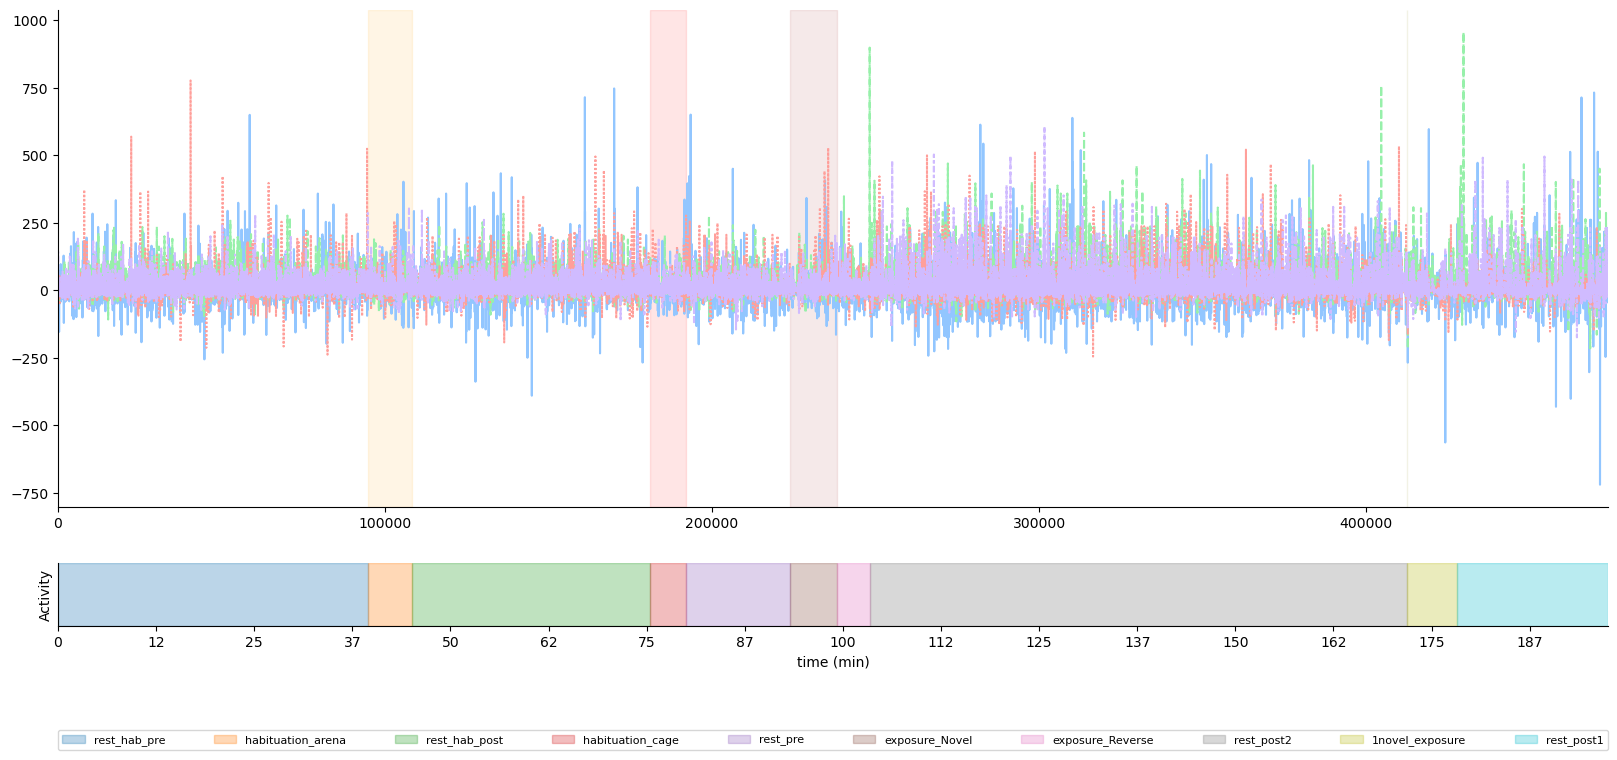

In [15]:
plot_assembly_activity_overtime(A013_day7_activity_Social, epoch_lengths)

<b> A015_day8 Mice Session <b>

1. Only one Join assembly found in 2 novel exposure
2. Neurons within that assembly was exactly the same as habituation arena
3. We couldnt isolate Social Joint assemblies in this mice session

In [139]:
#epoch_lengths = [
#    len(A015_day8_bins_p['A015_day8_rest_hab_pre'].to_numpy()),
#    len(A015_day8_bins_p['A015_day8_habituation_arena'].to_numpy()),
#    len(A015_day8_bins_p['A015_day8_rest_hab_post'].to_numpy()),
#    len(A015_day8_bins_p['A015_day8_habituation_cage'].to_numpy()),
#    len(A015_day8_bins_p['A015_day8_rest_pre'].to_numpy()),
#    len(A015_day8_bins_p['A015_day8_2novel_exposure'].to_numpy()),
#    len(A015_day8_bins_p['A015_day8_exposure_reversed'].to_numpy()),
#    len(A015_day8_bins_p['A015_day8_rest_post2'].to_numpy()),
#    len(A015_day8_bins_p['A015_day8_1novel_exposure'].to_numpy()),
#]


#A015_day8_activity_Social = Social_joint_CA2_CA3_assembly_activities_over_time_all['A015_day8_bins_p']
#plot_assembly_activity_overtime(A015_day8_activity_Social, epoch_lengths)

<b> A015_day12 Mice Session <b>

1. Two Joint Assemblies found in 2novel exposure
2. The first assembly (index 0) has high similarity with habituation arena
3. We could Isolate one Social Joint assemblies

In [63]:
A015_day12_activity_Social = Social_joint_CA2_CA3_assembly_activities_over_time_all['A015_day12_bins_p']

In [69]:
def remove_indices(d):
    for key in d.keys():
        d[key] = d[key][1:]  # Removing the first rows (index 0)
    return d

A015_day12_activity_Social_isolated = remove_indices(A015_day12_activity_Social)

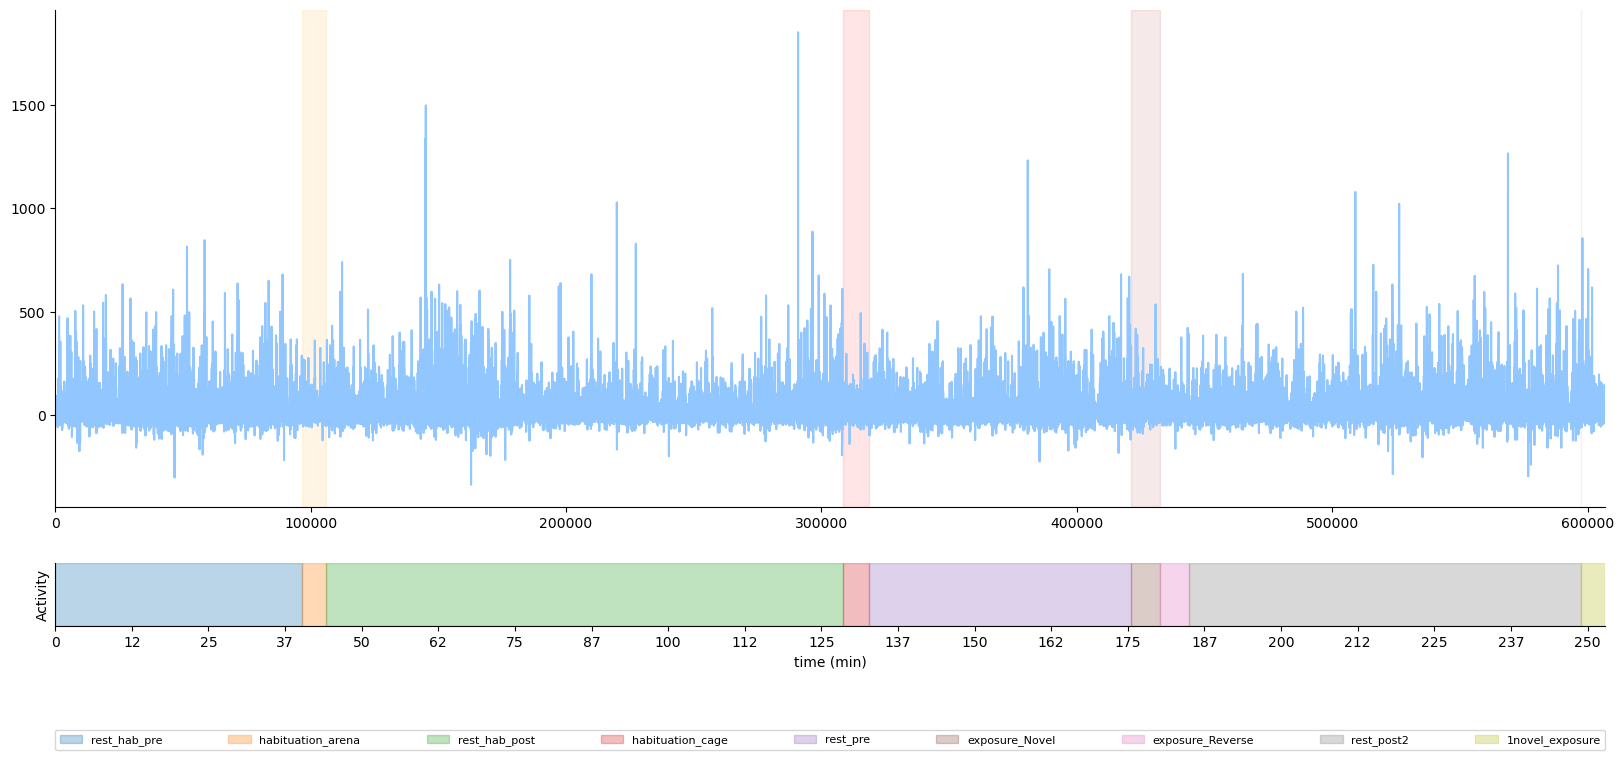

In [71]:
epoch_lengths = [
    len(A015_day12_bins_p['A015_day12_rest_hab_pre'].to_numpy()),
    len(A015_day12_bins_p['A015_day12_habituation_arena'].to_numpy()),
    len(A015_day12_bins_p['A015_day12_rest_hab_post'].to_numpy()),
    len(A015_day12_bins_p['A015_day12_habituation_cage'].to_numpy()),
    len(A015_day12_bins_p['A015_day12_rest_pre'].to_numpy()),
    len(A015_day12_bins_p['A015_day12_2novel_exposure'].to_numpy()),
    len(A015_day12_bins_p['A015_day12_exposure_reversed'].to_numpy()),
    len(A015_day12_bins_p['A015_day12_rest_post2'].to_numpy()),
    len(A015_day12_bins_p['A015_day12_1novel_exposure'].to_numpy()),
]


plot_assembly_activity_overtime(A015_day12_activity_Social_isolated, epoch_lengths)

<b> A016_day12 Mice Session <b>

1. We had 5 assemblies in 2novel exposure
2. assembly one has high similarity with habituation cage
3. assembly 5 (index 4) has high similarity with habituation arena
4. we could isolate two Joint Social Assemblies

In [75]:
A016_day12_activity_Social = Social_joint_CA2_CA3_assembly_activities_over_time_all['A016_day12_bins_p']

In [77]:
def remove_indices(d):
    for key in d.keys():
        d[key] = d[key][1:3]  # Removing the first rows (index 0)
    return d

A016_day12_activity_Social_isolated = remove_indices(A016_day12_activity_Social)

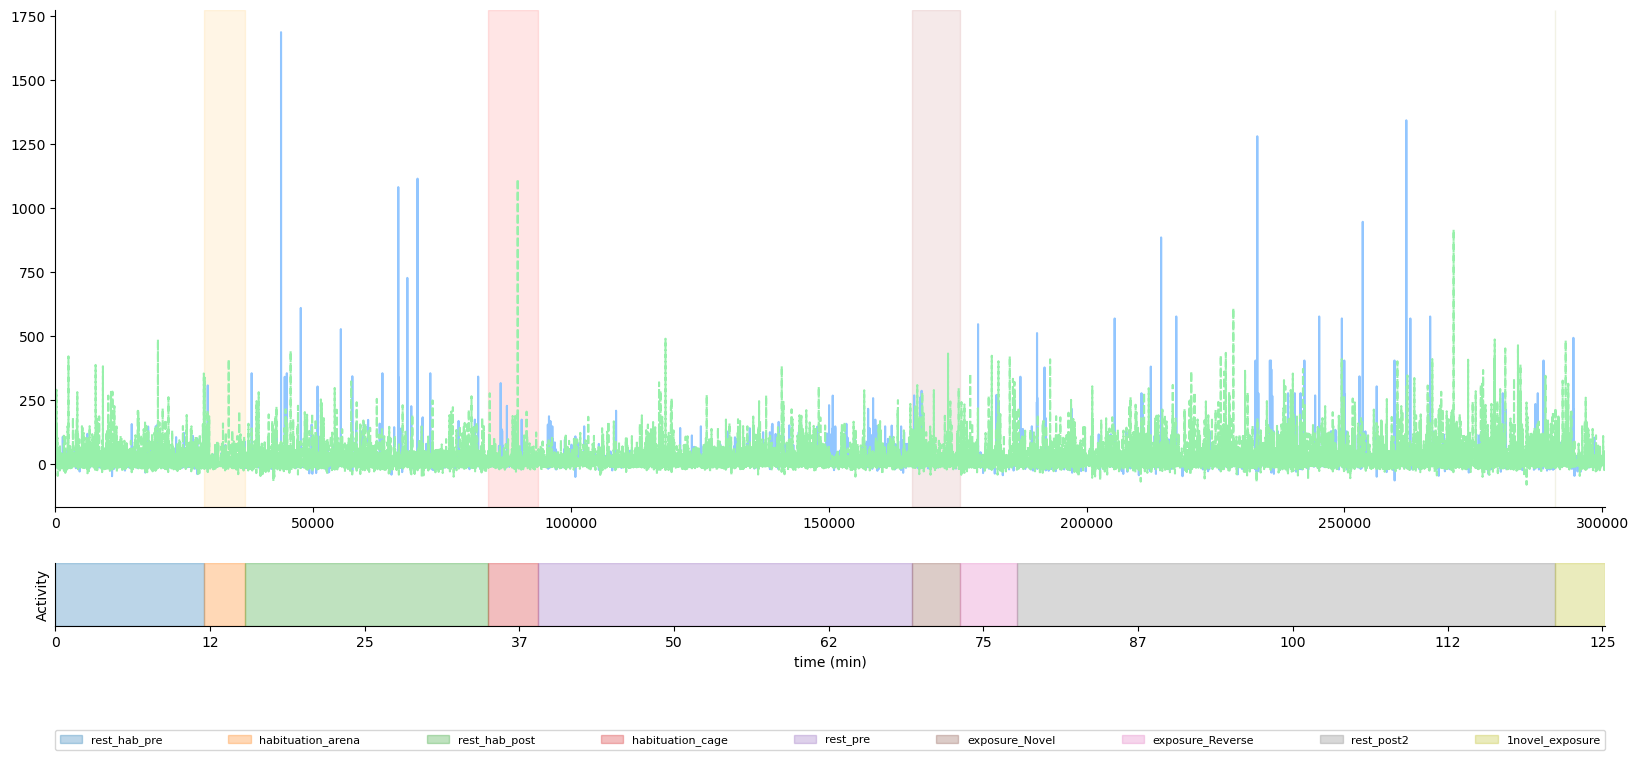

In [79]:
epoch_lengths = [
    len(A016_day12_bins_p['A016_day12_rest_hab_pre'].to_numpy()),
    len(A016_day12_bins_p['A016_day12_habituation_arena'].to_numpy()),
    len(A016_day12_bins_p['A016_day12_rest_hab_post'].to_numpy()),
    len(A016_day12_bins_p['A016_day12_habituation_cage'].to_numpy()),
    len(A016_day12_bins_p['A016_day12_rest_pre'].to_numpy()),
    len(A016_day12_bins_p['A016_day12_2novel_exposure'].to_numpy()),
    len(A016_day12_bins_p['A016_day12_exposure_reversed'].to_numpy()),
    len(A016_day12_bins_p['A016_day12_rest_post2'].to_numpy()),
    len(A016_day12_bins_p['A016_day12_1novel_exposure'].to_numpy()),
]


plot_assembly_activity_overtime(A016_day12_activity_Social_isolated, epoch_lengths)